# 目標

力学系に対して大まかな理解をする


# 力学系

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: 力学系

</div>
<div>

力学系とは以下の条件を満たす組 $(M, (g^t)_{t\in T})$ のことである[[1](#footnote1)]．

1. $(T, \cdot, e)$ がモノイドであり， $t$ を期間， $T$ を時間集合と呼ぶ．
2. $M$ は空でない集合である． $\boldsymbol{x}\in M$ を状態， $M$ を状態空間と呼ぶ．
3. $(g^t)_{t\in T}$ は $M\rightarrow M$ なる関数の族で $T$ で添字付けされる． 任意の $t\in T$ において $g^t$ を期間 $t$ におけるシステムの状態遷移と呼ぶ．
4. 任意の $v, t \in T$ ， および任意の $\boldsymbol{x} \in M$ において $g^0(\boldsymbol{x}) =\boldsymbol{x}$， $g^{v\cdot t}(\boldsymbol{x}) = g^{v}(g^{t}(\boldsymbol{x}))$
</div>
</div>

連続力学系も離散力学系もこの定義に沿って解釈ができる．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**具体例**: (力学系)

</div>
<div>

関数 $f(x) = 2x$ は数 $x$ に対し，それを 2 倍にしたものを割り当てるものであるが， $x$ を実験室の培地にいるバクテリアの個体数とすれば $f(x)$ は 1 時間後の培地にいるバクテリアの数と考えることができる．
2 時間後にいるバクテリアの数は $f(f(x)) = 4x$ である．上の定義に当てはめると $M = \mathbb{N}$， $(T, \cdot, e) = (\mathbb{N}, +, 0)$， $g^t = f(f(f(\dots)))$ となる．

</div>
</div>

このように，力学系は (可能な) 状態の集合 ($M$) と，過去の状態から未来の状態を決定する規則 ($g^t$) から成り立っている[[2](#footnote2)]．
また，力学系においては未来の状態が過去の状態から一意的に定められるという**決定論的な立場**をとる． (そうでないものは力学系ではなく確立過程と呼ばれる)


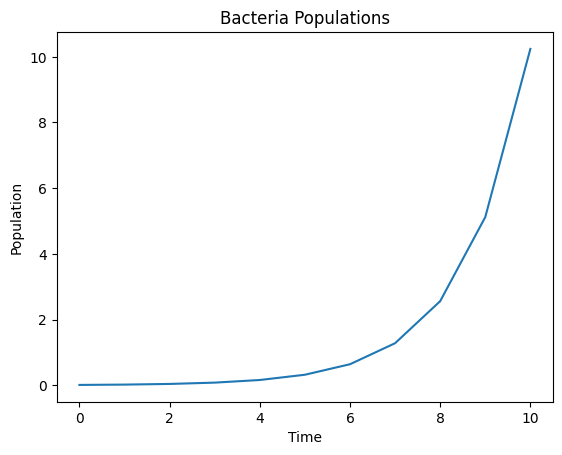

In [1]:
import matplotlib.pyplot as plt


# f(x) = 2x の規則
def f(x: float):
    return 2.0 * x


# 初期値
x: float = 0.01

# シミュレーションのステップ数
steps = 10

# バクテリアの個体数のリスト
X: list[float] = [x]

# シミュレーション
for _ in range(steps):
    x = f(x)
    X.append(x)

# プロット
plt.plot(X)
plt.title("Bacteria Populations")
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

# 離散力学系

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: 離散力学系

</div>
<div>

過去の状態から未来の状態を決定する規則が離散時間で与えられるものを離散力学系という．

</div>
</div>

先述の[具体例:(力学系)](#ex1)は $T = \mathbb{N}$ で離散的なので離散力学系である．
離散力学系における規則の時間(期間)を短くしていった極限が連続力学系である．このとき，規則は微分方程式の組となる[[2](#footnote2)]．

<figure style="width: 100%; max-width: 500px; margin: 0 auto; text-align: center;">
  <img src="./img/desc_cont.png" alt="離散力学系と連続力学系の違い" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">離散力学系と連続力学系の違い</figcaption>
</figure>

まずは，連続力学系を勉強する前に離散力学系を学ぶ．


## 不動点

$x = 0.5$ からバクテリアの個体数には変化が見られなくなる．というのも $f(0.5) = 2\times 0.5\times (1 - 0.5) = 0.5$ より， $x = 0.5$ で変化がなくなるのは明らかである．
このように $f(p) = p$ なる $p$ を **$f$ の不動点** という．

$y=x$ のグラフとともに示すと動きがわかりやすいだろう．


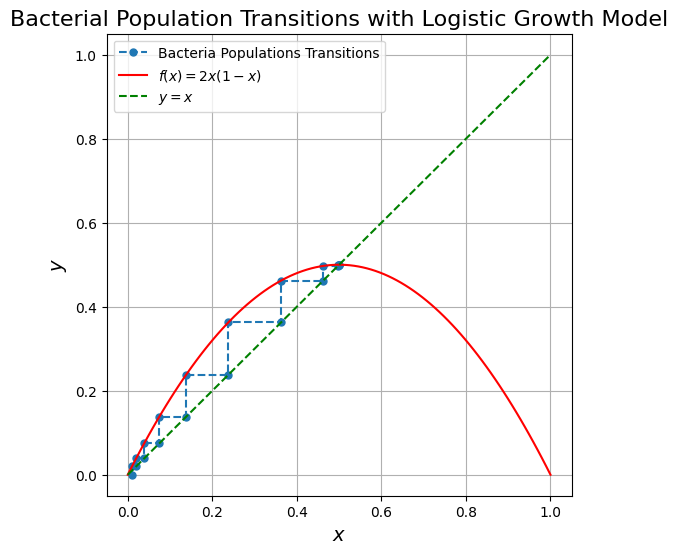

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def f(x: float | np.ndarray):
    return 2.0 * x * (1 - x)


# 初期値
x_init: float = 0.01

# シミュレーションのステップ数
steps = 10

# シミュレーションのプロット用
x_values: list[float] = [x_init]
y_values: list[float] = [0.0]

# シミュレーション
for step in range(steps):
    x_current: float = x_values[-1]
    y_current: float = f(x_current)
    x_values.extend([x_current, y_current])
    y_values.extend([y_current, y_current])

# f(x) = 2x(1-x) のグラフ
x: np.ndarray = np.linspace(0, 1, 100)
y_logistic: np.ndarray = f(x)

# y = x の直線
y_identity = x

# グラフのプロット
plt.figure(figsize=(6, 6))
plt.plot(
    x_values,
    y_values,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Bacteria Populations Transitions",
)
plt.plot(x, y_logistic, label="$f(x) = 2x(1-x)$", color="red")
plt.plot(x, y_identity, label="$y=x$", linestyle="--", color="green")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Bacterial Population Transitions with Logistic Growth Model", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## 不動点の安定性

不動点周りでの状態の挙動は 2 種類ある．不動点に引き込まれるもの(**沈点**)と，不動点から離れていくもの(**源点**)である．
不動転 $p$ に対して， $|f'(p)| < 1$ なら沈点，$|f'(p)| > 1$ なら源点である．
先ほどの $f(x) = 2x(1-x)$ においては， $x=0$ が源点， $x = \frac{1}{2}$ が沈点である．

<div style="width:300px;display:flex;gap:10px;">
<img src="img/source_point.png" style="width:50%;object-fit:scale-down;"/>
<img src="img/sinking_point.png" style="width:50%;object-fit:scale-down;"/>
</div>


## 周期点

先ほどのロジスティック成長のモデルを変形して $f(x) = 3.3x(1-x)$ としてみよう．このとき不動転は $x=0, \frac{23}{33}$ であるが $f'(0) = 3.3,\quad f(\frac{23}{33}) = -1.3$
で双方とも源点である．
沈点がないがこのモデルでは個体数は無限に発散してしまうのだろうか?

以下にその結果を示す．


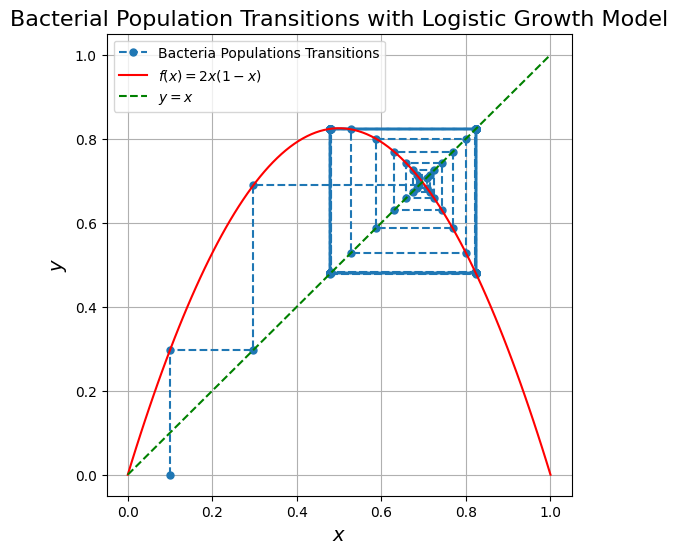

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def f(x: float | np.ndarray):
    return 3.3 * x * (1 - x)


# 初期値
x_init: float = 0.1

# シミュレーションのステップ数
steps = 50

# シミュレーションのプロット用
x_values: list[float] = [x_init]
y_values: list[float] = [0.0]

# シミュレーション
for step in range(steps):
    x_current: float = x_values[-1]
    y_current: float = f(x_current)
    x_values.extend([x_current, y_current])
    y_values.extend([y_current, y_current])

# f(x) = 3.3x(1-x) のグラフ
x: np.ndarray = np.linspace(0, 1, 100)
y_logistic: np.ndarray = f(x)

# y = x の直線
y_identity = x

# グラフのプロット
plt.figure(figsize=(6, 6))
plt.plot(
    x_values,
    y_values,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Bacteria Populations Transitions",
)
plt.plot(x, y_logistic, label="$f(x) = 2x(1-x)$", color="red")
plt.plot(x, y_identity, label="$y=x$", linestyle="--", color="green")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Bacterial Population Transitions with Logistic Growth Model", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

$0.48, 0.82, 0.48, 0.82, 0.48, 0.82,\dots$
と周期的な変動に落ち着くことがわかる．このように $f^k(p) = p$ なる点を **$f$ の $k$ 周期点** という．
つまり $0.48, 0.82$ は $f$ の 2 周期点ということができる．
また， $f$ の $k$ 周期点は $f^{k}$ の不動点でもある．

この周期軌道に対しても沈点，源点のような安定性を定義でき， それは $f^{k}$ の不動点としてそれの安定性と一致する[[2](#footnote2)]

沈点を含め，このように時間発展する軌道を引きつける領域を **アトラクター** という．


## 多次元力学系

先ほどは状態空間を $M = \mathbb{R}$ として 1 次元での力学系について扱っていた．今回は $M = \mathbb{R}^2$ での力学系を考える．

$$
\displaystyle{
    \boldsymbol{f}(x,y) = (1 - ax^2 + by, x)
}
$$

なる写像 $\boldsymbol{f}: \mathbb{R}^2\rightarrow \mathbb{R}^2$ を考える．これはエノン写像の一種である．


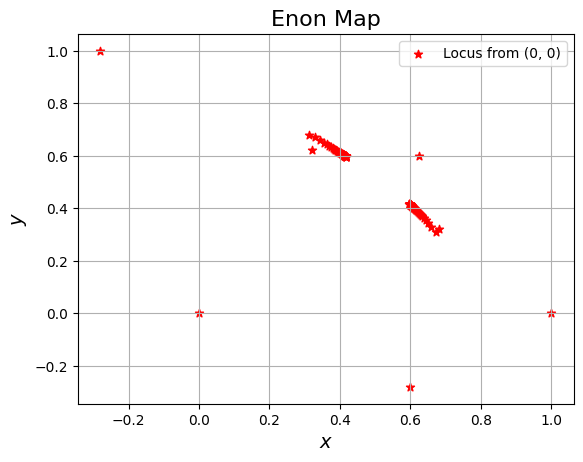

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# エノン写像
def f(x: float | np.ndarray, y: float | np.ndarray, a: float = 1.28, b: float = -0.3):
    return 1 - a * x * x + b * y, x


# 初期値
x, y = 0, 0

X: list[float] = [x]
Y: list[float] = [y]

steps = 100

for _ in range(steps):
    x, y = f(x, y)
    X.append(x)
    Y.append(y)


plt.scatter(X, Y, marker="*", label="Locus from (0, 0)", color="red")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Enon Map", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## 脚注

<a name="footnote1">1</a>: Giunti, M., & Mazzola, C. (2012). Dynamical systems on monoids: Toward a general theory of deterministic systems and motion. In _Methods, models, simulations and approaches towards a general theory of change_ (pp. 173-185).

<a name="footnote2">2</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門』(Chaos: Introduction to Dynamical Systems), シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].
